## TTF EUA

In [16]:
ttf_spot = pd.read_excel('data/ttf_spot.xlsx', sheet_name='actual', parse_dates=False)
eua_spot = pd.read_excel('data/eua_spot.xlsx', sheet_name='actual', parse_dates=False)

<Axes: xlabel='Date'>

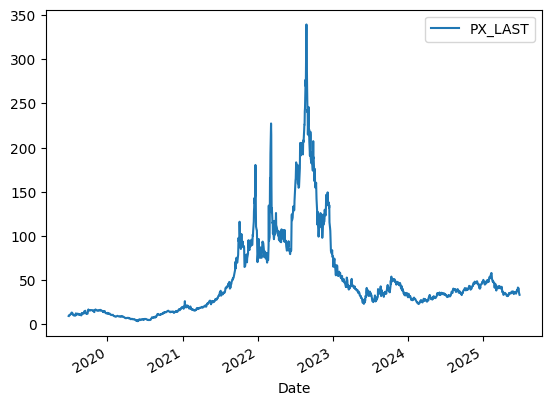

In [17]:
ttf_spot.plot(kind='line', y='PX_LAST', x='Date')

<Axes: xlabel='Date'>

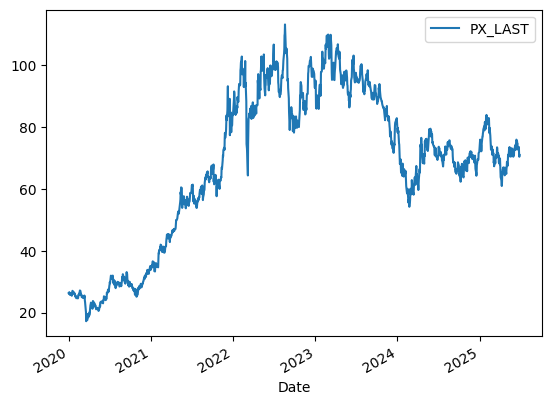

In [450]:
eua_spot.plot(kind='line', x='Date', y='PX_LAST')

In [18]:
ttf_spot['log_ttf'] = np.log(ttf_spot['PX_LAST'])
ttf_spot['log_change_ttf'] = ttf_spot['log_ttf'].diff()
ttf_spot = ttf_spot.set_index('Date')

In [19]:
ttf = ttf_spot['log_change_ttf'].resample('W-MON').mean().dropna()

In [20]:
eua_spot['log_eua'] = np.log(eua_spot['PX_LAST'])
eua_spot['log_change_eua'] = eua_spot['log_eua'].diff()
eua_spot = eua_spot.set_index('Date')

In [21]:
eua = eua_spot['log_change_eua'].resample('W-MON').mean().dropna()


In [22]:
ttf

Date
2019-07-01   -0.028959
2019-07-08   -0.027901
2019-07-15    0.005921
2019-07-22    0.012023
2019-07-29    0.018670
                ...   
2025-06-02    0.006358
2025-06-09    0.006867
2025-06-16   -0.025300
2025-06-23    0.019737
2025-06-30    0.021803
Freq: W-MON, Name: log_change_ttf, Length: 314, dtype: float64

In [23]:
eua.to_csv('eua.csv')

In [24]:
eua = eua.to_frame().reset_index()

In [25]:
ttf = ttf.to_frame().reset_index()


In [26]:
merged_ttf_eua_2 = regr.join([eua['log_change_eua'], ttf['log_change_ttf']], how='left')

NameError: name 'regr' is not defined

In [1]:
merged_ttf_eua_2['log_change_ttf_lagged'] = merged_ttf_eua_2['log_change_ttf'].shift(12)
merged_ttf_eua_2['log_change_eua_lagged'] = merged_ttf_eua_2['log_change_eua'].shift(1)

NameError: name 'merged_ttf_eua_2' is not defined

In [507]:
merged_ttf_eua_2['change_ttf_eua'] = merged_ttf_eua_2['log_change_ttf'] - merged_ttf_eua_2['log_change_eua']

In [556]:
model_eua = smf.ols("return_cleaned ~ dlog_lagged + log_change_eua_lagged",
                data=merged_ttf_eua_2).fit(cov_type='HAC', cov_kwds={'maxlags':1})


model_eua.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         return_cleaned   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     3.547
Date:                Fri, 27 Jun 2025   Prob (F-statistic):             0.0302
Time:                        16:37:59   Log-Likelihood:                 925.49
No. Observations:                 270   AIC:                            -1845.
Df Residuals:                     267   BIC:                            -1834.
Df Model:                           2                                         
Covariance Type:                  HAC                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.0010      0.001     -1.841      0.066      -0.002    6.18e-05
dlog_lagged              -0.0219      0.010     -2.299      0.022      -0.041      -0.003
log_change_eua_lagged    -0.0726      0.039     -1.871      0.061      -0.149       0.003
==============================================================================
Omnibus:                       26.434   Durbin-Watson:                   1.597
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.160
Skew:                          -0.456   Prob(JB):                     3.18e-14
Kurtosis:                       5.167   Cond. No.                         91.6
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 1 lags and without small sample correction
"""

In [550]:
daily = spot['return_cleaned'].resample('D').mean().dropna()

In [551]:
daily.to_csv('daily.csv')